In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np
df = pd.read_excel (r'tensile_updated.xlsx')
display(df.head(5))

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df1 = pd.read_excel(r'tensile_updated.xlsx')

df1.hist()

plt.show()

In [ ]:
df.describe()


,RUN,ROTATIONAL SPEED,TRAVERSE SPEED,TILT ANGLE,AXIAL LOAD,TENSILE STRENGTH
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,1050.000000,45.000000,2.500000,6.000000,297.724138
std,8.514693,294.594152,9.819805,0.981981,1.963961,10.250075
min,1.000000,600.000000,30.000000,1.000000,3.000000,284.000000
25%,8.000000,1050.000000,45.000000,2.500000,6.000000,292.000000
50%,15.000000,1050.000000,45.000000,2.500000,6.000000,296.000000
75%,22.000000,1050.000000,45.000000,2.500000,6.000000,298.000000
max,29.000000,1500.000000,60.000000,4.000000,9.000000,320.000000


In [ ]:
import seaborn as sns

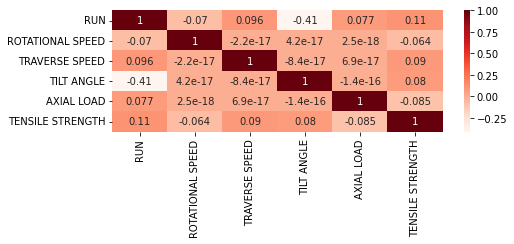

In [ ]:
df[["RUN","ROTATIONAL SPEED","TRAVERSE SPEED","TILT ANGLE","AXIAL LOAD","TENSILE STRENGTH"]].corr()
sns.heatmap(df[["RUN","ROTATIONAL SPEED","TRAVERSE SPEED","TILT ANGLE","AXIAL LOAD","TENSILE STRENGTH"]].corr(),annot=True,cmap='Reds')

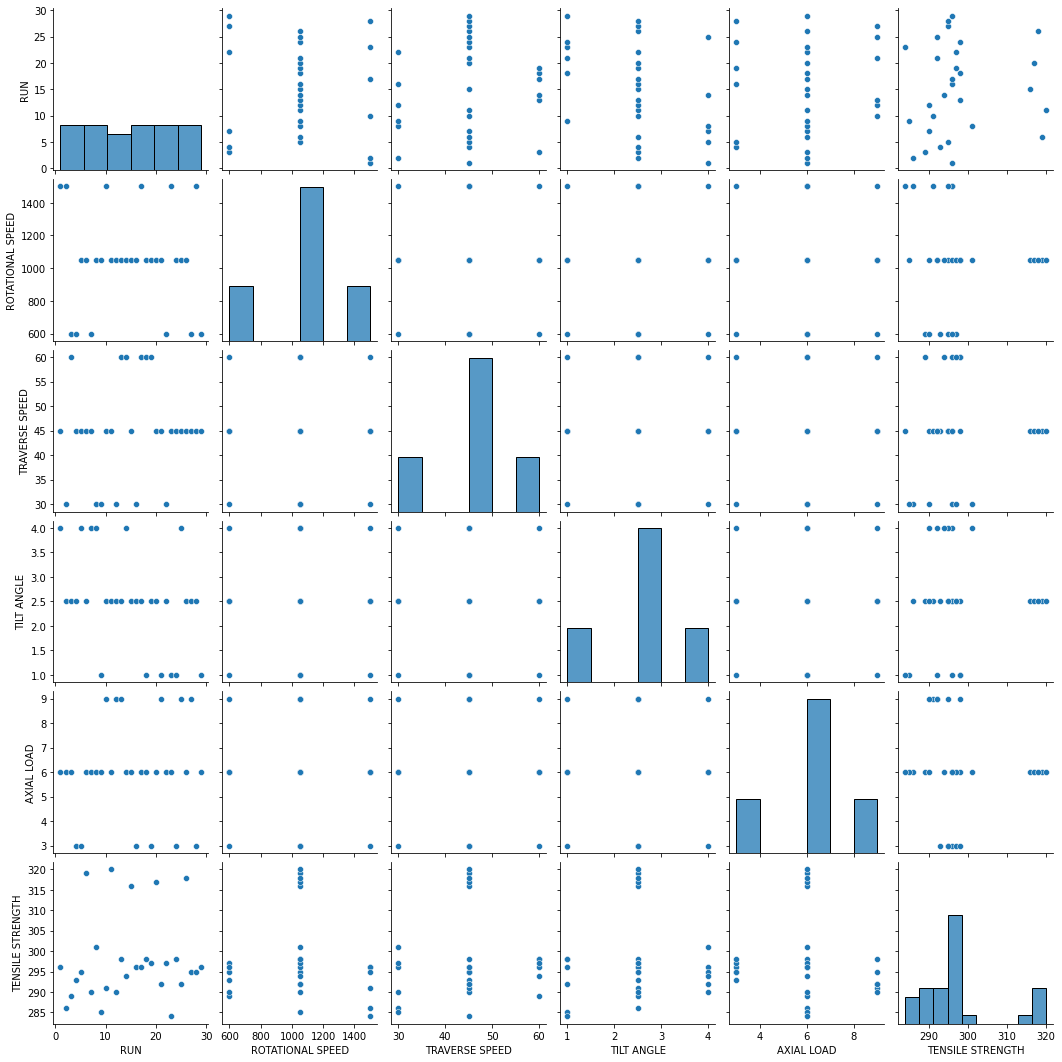

In [ ]:
sns.pairplot(data=df,vars=["RUN","ROTATIONAL SPEED","TRAVERSE SPEED","TILT ANGLE","AXIAL LOAD","TENSILE STRENGTH"])
plt.show()            

In [ ]:
import missingno as msno

In [ ]:
msno.heatmap(df)

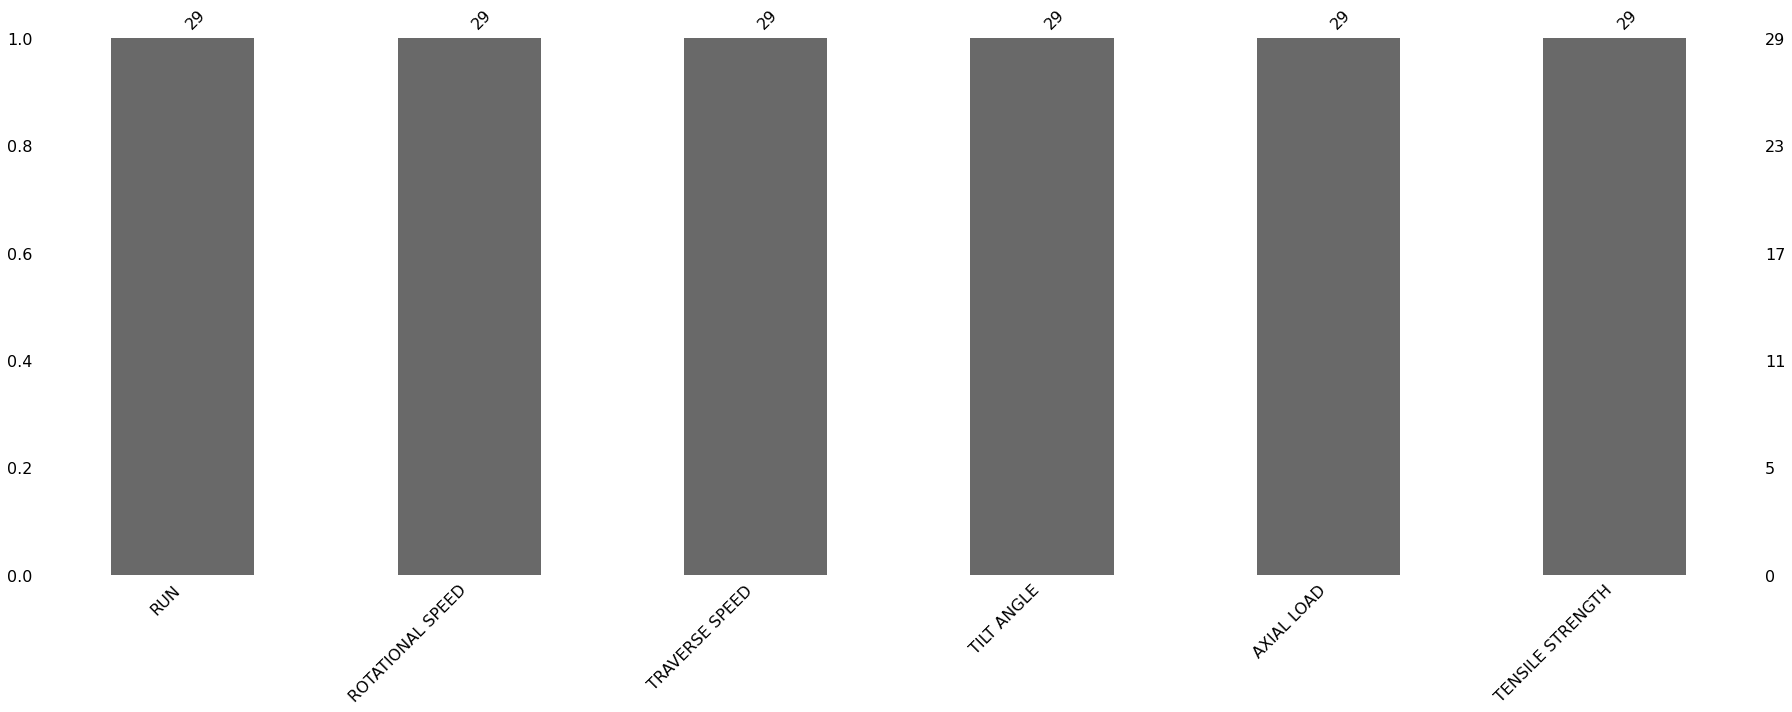

In [ ]:
msno.bar(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


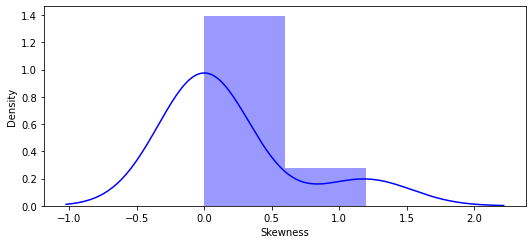

In [ ]:
#y = df['TENSILE STRENGTH']
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


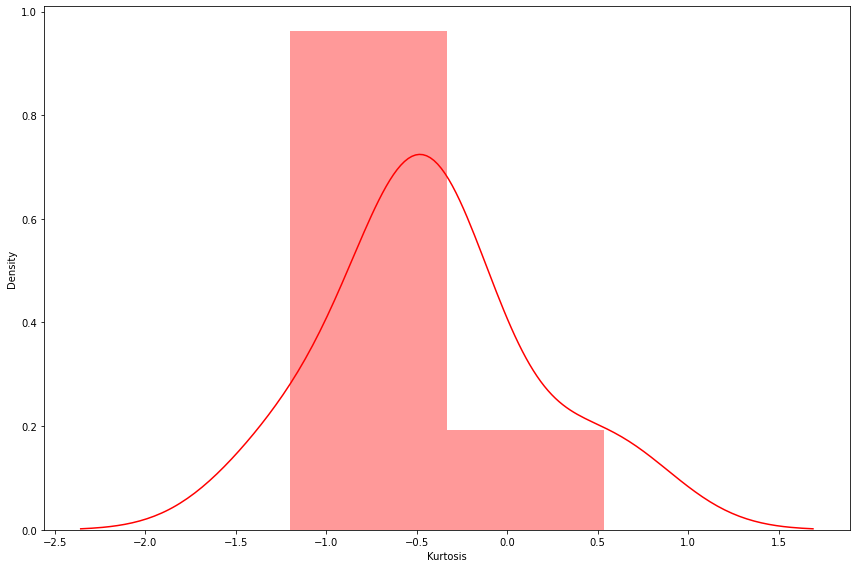

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

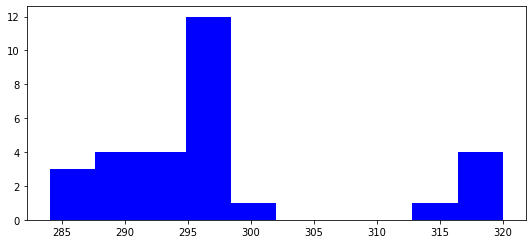

In [ ]:
plt.hist(df['TENSILE STRENGTH'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

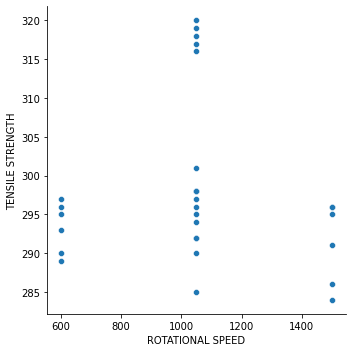

In [ ]:
import seaborn as sns
g = sns.relplot(data=df, x=df['ROTATIONAL SPEED'], y=df['TENSILE STRENGTH']);

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


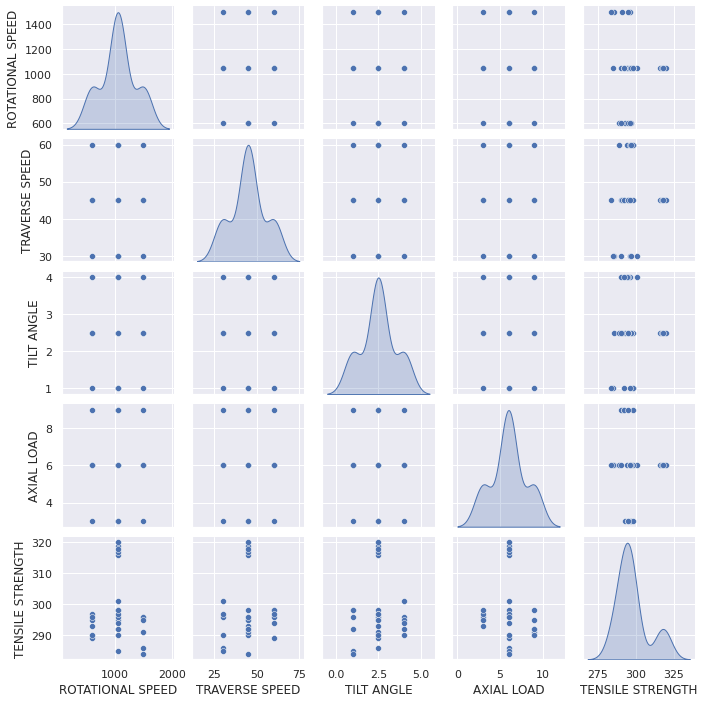

In [ ]:
sns.set()
columns = ['ROTATIONAL SPEED', 'TRAVERSE SPEED', 'TILT ANGLE', 'AXIAL LOAD','TENSILE STRENGTH']
sns.pairplot(df[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

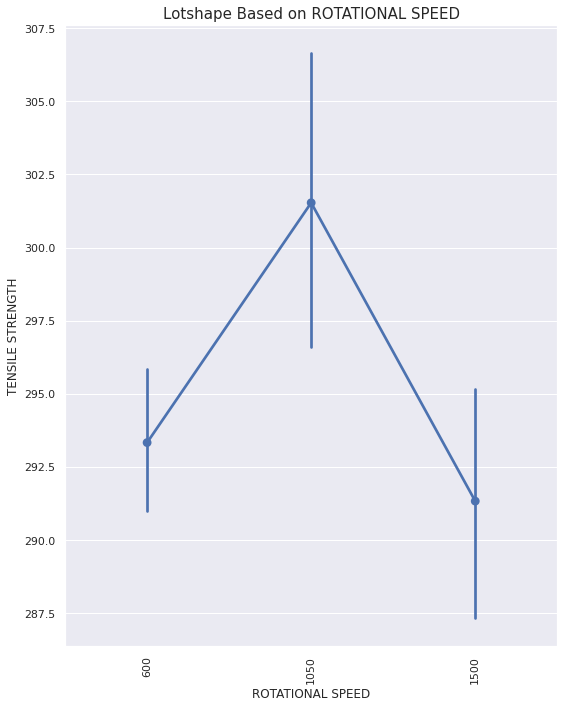

In [ ]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='ROTATIONAL SPEED', y='TENSILE STRENGTH', 
                   data=df, )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on ROTATIONAL SPEED", fontsize=15)
g1.set_xlabel("ROTATIONAL SPEED")
g1.set_ylabel("TENSILE STRENGTH", fontsize=12)
plt.show()

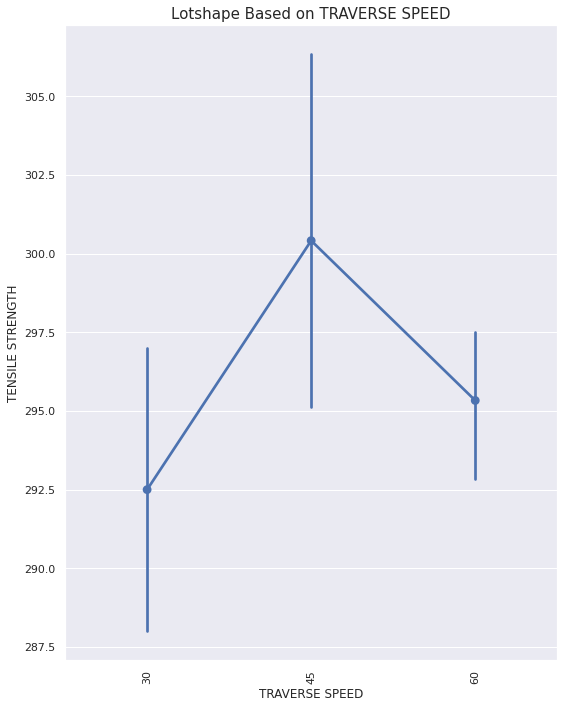

In [ ]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='TRAVERSE SPEED', y='TENSILE STRENGTH', 
                   data=df, )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on TRAVERSE SPEED", fontsize=15)
g1.set_xlabel("TRAVERSE SPEED")
g1.set_ylabel("TENSILE STRENGTH", fontsize=12)
plt.show()

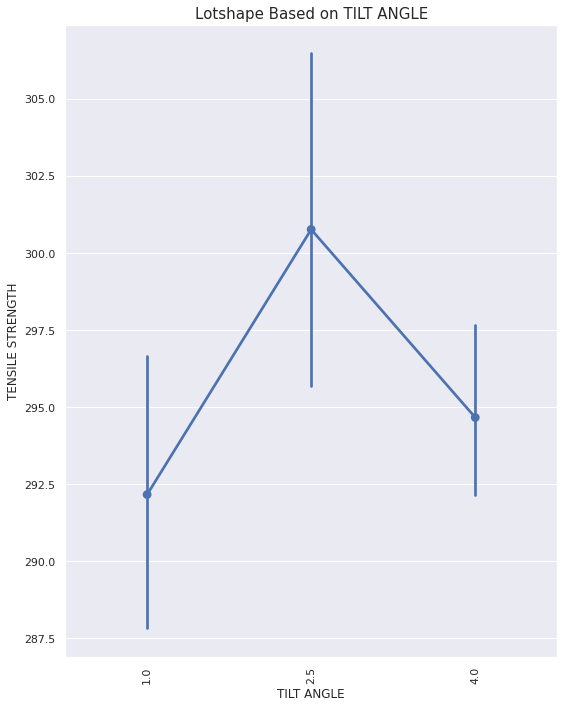

In [ ]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='TILT ANGLE', y='TENSILE STRENGTH', 
                   data=df, )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on TILT ANGLE", fontsize=15)
g1.set_xlabel("TILT ANGLE")
g1.set_ylabel("TENSILE STRENGTH", fontsize=12)
plt.show()

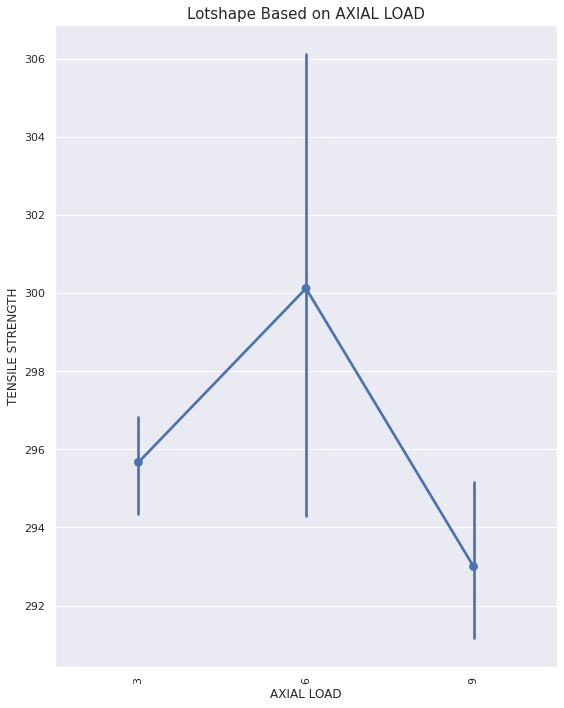

In [ ]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='AXIAL LOAD', y='TENSILE STRENGTH', 
                   data=df, )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on AXIAL LOAD", fontsize=15)
g1.set_xlabel("AXIAL LOAD")
g1.set_ylabel("TENSILE STRENGTH", fontsize=12)
plt.show()

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['TENSILE STRENGTH']
Predictors=['ROTATIONAL SPEED', 'TRAVERSE SPEED', 'TILT ANGLE', 'AXIAL LOAD']

X=df[Predictors].values
y=df[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26, 4)
(26, 1)
(3, 4)
(3, 1)


In [ ]:
from keras.metrics import MeanAbsoluteError
from keras.optimizers import rmsprop_v2
import keras

# importing the libraries

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout

In [ ]:
# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=160, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=480, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal',activation="linear"))


In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='mse',metrics=['mse', 'mae', 'mape'])

In [ ]:
# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, batch_size=len(X_train),epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.1521 - mse: 1.1521 - mae: 0.8203 - mape: 111.8303
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 1.0902 - mse: 1.0902 - mae: 0.7643 - mape: 100.1051
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 1.0380 - mse: 1.0380 - mae: 0.7226 - mape: 118.4280
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 1.0103 - mse: 1.0103 - mae: 0.7028 - mape: 135.7833
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.9676 - mse: 0.9676 - mae: 0.6768 - mape: 159.8633
Epoch 6/50
1/1 [==============================] - 0s 16ms/step - loss: 0.9435 - mse: 0.9435 - mae: 0.6656 - mape: 177.5464
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 0.9299 - mse: 0.9299 - mae: 0.6668 - mape: 224.4552
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.9232 - mse: 0.9232 - mae: 0.6539 - mape: 249.2796
Epoch 9/50
1/1 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               800       
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 480)               77280     
                                                                 
 dropout_1 (Dropout)         (None, 480)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               123136    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 201,473
Trainable params: 201,473
Non-trai

In [ ]:
import seaborn as sb

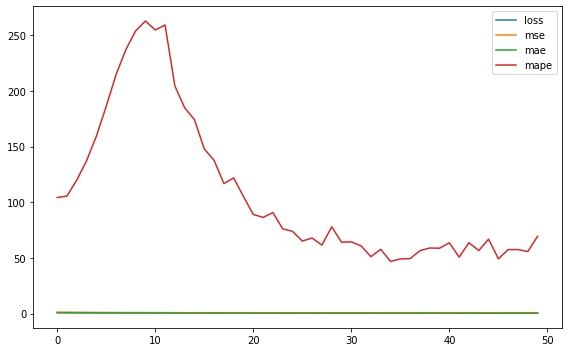

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'mape'])


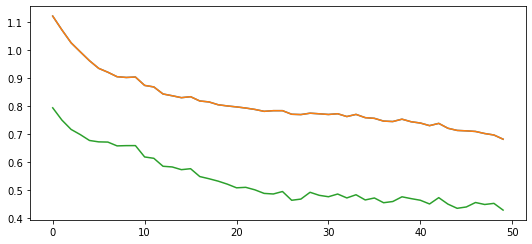

In [ ]:
# plot metrics
plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])

plt.show()

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=160, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dropout(0.2))
            # Defining the Second layer of the model
            model.add(Dense(units=480, kernel_initializer='normal', activation='relu'))
            model.add(Dropout(0.2))

            model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 89ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: -345.2831320585899
1/1 [==============================] - 0s 79ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: -157.23756524975363
1/1 [==============================] - 0s 114ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: -326.13623283039163
1/1 [==============================] - 0s 81ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: -398.13953250985395
1/1 [==============================] - 0s 74ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: -492.26686052011326
1/1 [==============================] - 0s 70ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: -375.9777411831355
1/1 [==============================] - 0s 121ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: -198.48381570571354
1/1 [==============================] - 0s 69ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: -395.71182440107464
1/1 [=======

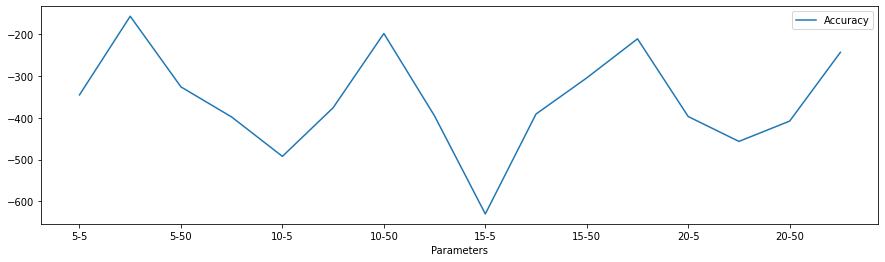

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['TENSILE STRENGTH']=y_test_orig
TestingData['Predicted TENSILE STRENGTH']=Predictions
TestingData.head()

1/1 [==============================] - 0s 52ms/step


,ROTATIONAL SPEED,TRAVERSE SPEED,TILT ANGLE,AXIAL LOAD,TENSILE STRENGTH,Predicted TENSILE STRENGTH
0,1500.0,45.0,2.5,3.0,295.0,296.124084
1,1500.0,60.0,2.5,6.0,296.0,297.996033
2,1050.0,60.0,2.5,9.0,298.0,293.867126


In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_train)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_train)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_train)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['TENSILE STRENGTH']=y_test_orig
TestingData['Predicted TENSILE STRENGTH']=Predictions
TestingData.head()

1/1 [==============================] - 0s 30ms/step


,ROTATIONAL SPEED,TRAVERSE SPEED,TILT ANGLE,AXIAL LOAD,TENSILE STRENGTH,Predicted TENSILE STRENGTH
0,1500.0,45.0,1.0,6.0,284.0,285.734985
1,1050.0,30.0,1.0,6.0,285.0,285.766602
2,1500.0,45.0,2.5,9.0,291.0,292.315247
3,600.0,30.0,2.5,6.0,297.0,296.642670
4,1500.0,45.0,4.0,6.0,296.0,296.681854


In [ ]:
TestingData

,ROTATIONAL SPEED,TRAVERSE SPEED,TILT ANGLE,AXIAL LOAD,TENSILE STRENGTH,Predicted TENSILE STRENGTH
0,1500.0,45.0,1.0,6.0,284.0,285.734985
1,1050.0,30.0,1.0,6.0,285.0,285.766602
2,1500.0,45.0,2.5,9.0,291.0,292.315247
3,600.0,30.0,2.5,6.0,297.0,296.642670
4,1500.0,45.0,4.0,6.0,296.0,296.681854
5,600.0,45.0,2.5,9.0,295.0,295.349854
6,1050.0,60.0,4.0,6.0,294.0,294.698547
7,1050.0,30.0,2.5,3.0,296.0,296.522614
8,1050.0,30.0,2.5,9.0,290.0,290.552032
9,1050.0,60.0,1.0,6.0,298.0,297.202789


In [ ]:
plt.figure(figsize=(15, 15))


ax1 = sns.distplot(df['TENSILE STRENGTH'], hist=False, color="r", label="Actual Value")
sns.distplot(Predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for Tensile Strength')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['TENSILE STRENGTH']-TestingData['Predicted TENSILE STRENGTH'])/TestingData['TENSILE STRENGTH'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

In [ ]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=160, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=480, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_